<a href="https://colab.research.google.com/github/jeanlamarre16/datascience/blob/main/TP1_classification_champignons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning TP1 : Reconnaissance de Champignon

### Import des librairies

In [3]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
from google.colab import drive
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

In [14]:
# Montage du dossier google drive pour la récupération du fichier champignons.csv
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y a pas de valeurs nulles

In [15]:
# Importation du fichier de data champignons.csv
df_champignon = pd.read_csv('/content/drive/MyDrive/Data/champignons.csv')

In [16]:
# Création d'un dataframe avec pandas
df = pd.DataFrame(df_champignon)

In [17]:
# Affichage des données du dataframe
df

,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,lisse,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
1,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
2,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
3,toxique,écaillée,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
4,comestible,lisse,non,libre,large,effilé,lisse,blanc,blanc,évasé,abondante
...,...,...,...,...,...,...,...,...,...,...,...
8119,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8120,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,brun,pendant,variée
8121,comestible,lisse,non,adhérent,large,élargissant,lisse,orange,orange,pendant,clairsemée
8122,toxique,écaillée,non,libre,étroit,effilé,lisse,blanc,blanc,évasé,variée


In [13]:
# Affichage du nombre de champignons toxiques ou non
nb_champignons = df_champignon['toxicite'].value_counts()
print(nb_champignons)

toxicite
comestible    4208
toxique       3916
Name: count, dtype: int64


1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [18]:
# Création d'une instance OneHotEncoder pour la génération d'un matrice sparse
encoder = OneHotEncoder(sparse_output=False, drop=None)

In [19]:
# Mappage des catégories à des valeurs numériques pour l'encodage avec oneHotEncoder
encoded_array = encoder.fit_transform(df)

In [20]:
# Génération des nouveaux noms de colonnes après transformation
encoded_columns = encoder.get_feature_names_out(df.columns)

In [21]:
# Réconstruction du dataframe encodé
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)

In [22]:
df_encoded

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8121,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
print(f"Affichage de la taille des données : {df_encoded.shape[0]} lignes x {df_encoded.shape[1]} colonnes")

Affichage de la taille des données : 8124 lignes x 42 colonnes


In [24]:
# Convertir en DataFrame
columns_df = pd.DataFrame({"Affichage des noms des colonnes": df_encoded.columns})
# Désactiver l'index dans l'affichage
print(columns_df.to_string(index=True))

     Affichage des noms des colonnes
0                toxicite_comestible
1                   toxicite_toxique
2           surface-chapeau_fibreuse
3              surface-chapeau_lisse
4           surface-chapeau_rainurée
5           surface-chapeau_écaillée
6                     ecchymoses_non
7                     ecchymoses_oui
8          attache-lamelles_adhérent
9             attache-lamelles_libre
10             taille-lamelles_large
11            taille-lamelles_étroit
12                 forme-pied_effilé
13            forme-pied_élargissant
14  surface-pied-sur-anneau_fibreuse
15     surface-pied-sur-anneau_lisse
16   surface-pied-sur-anneau_soyeuse
17  surface-pied-sur-anneau_écaillée
18     couleur-pied-sur-anneau_beige
19     couleur-pied-sur-anneau_blanc
20      couleur-pied-sur-anneau_brun
21  couleur-pied-sur-anneau_cannelle
22      couleur-pied-sur-anneau_gris
23     couleur-pied-sur-anneau_jaune
24    couleur-pied-sur-anneau_orange
25      couleur-pied-sur-anneau_rose
2

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [25]:
# La méthode get_feature_names_out() de OneHotEncoder a été déjà utilisé plus haut.
# J'ai donc conservé le dataframe initiale pour la suite du traitement (pour éviter de répéter le même process)
df_shuffled = shuffle(df_encoded, random_state=42)

In [26]:
# Affichage du dataFrame mélangé
df_shuffled

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
1971,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6654,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5606,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3332,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6988,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5390,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
860,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7603,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [29]:
# Séparer les labels et les features
labels = df_encoded["toxicite_toxique"]
features = df_encoded.drop(columns=["toxicite_toxique", "toxicite_comestible"])

In [30]:
# Diviser les données en jeux d'entraînement et de développement - feature_train, label_train, feature_dev, label_dev - (70/30)
feature_train, feature_dev, label_train, label_dev = train_test_split(
    features, labels, test_size=0.3, random_state=42, stratify=labels
)

In [38]:
# Vérification de la taille des jeux de données
print(f"feature train : {feature_train.shape} | label train : {label_train.shape}")
print(f"feature dev : {feature_dev.shape}   | label dev : {label_dev.shape}")

feature_train : (5686, 40) | label_train : (5686,)
feature_dev : (2438, 40)   | label_dev : (2438,)


## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

In [41]:
# Import de DecisionTreeClassifier, plot_tree pour la mise en place des arbres de décision
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [42]:
# Import de matplotlib pour la création des graphiques et la visualisation des données
import matplotlib.pyplot as plt

In [43]:
# Initialisation du DécisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
dtc.fit(feature_train, label_train)

DecisionTreeClassifier(random_state=42)

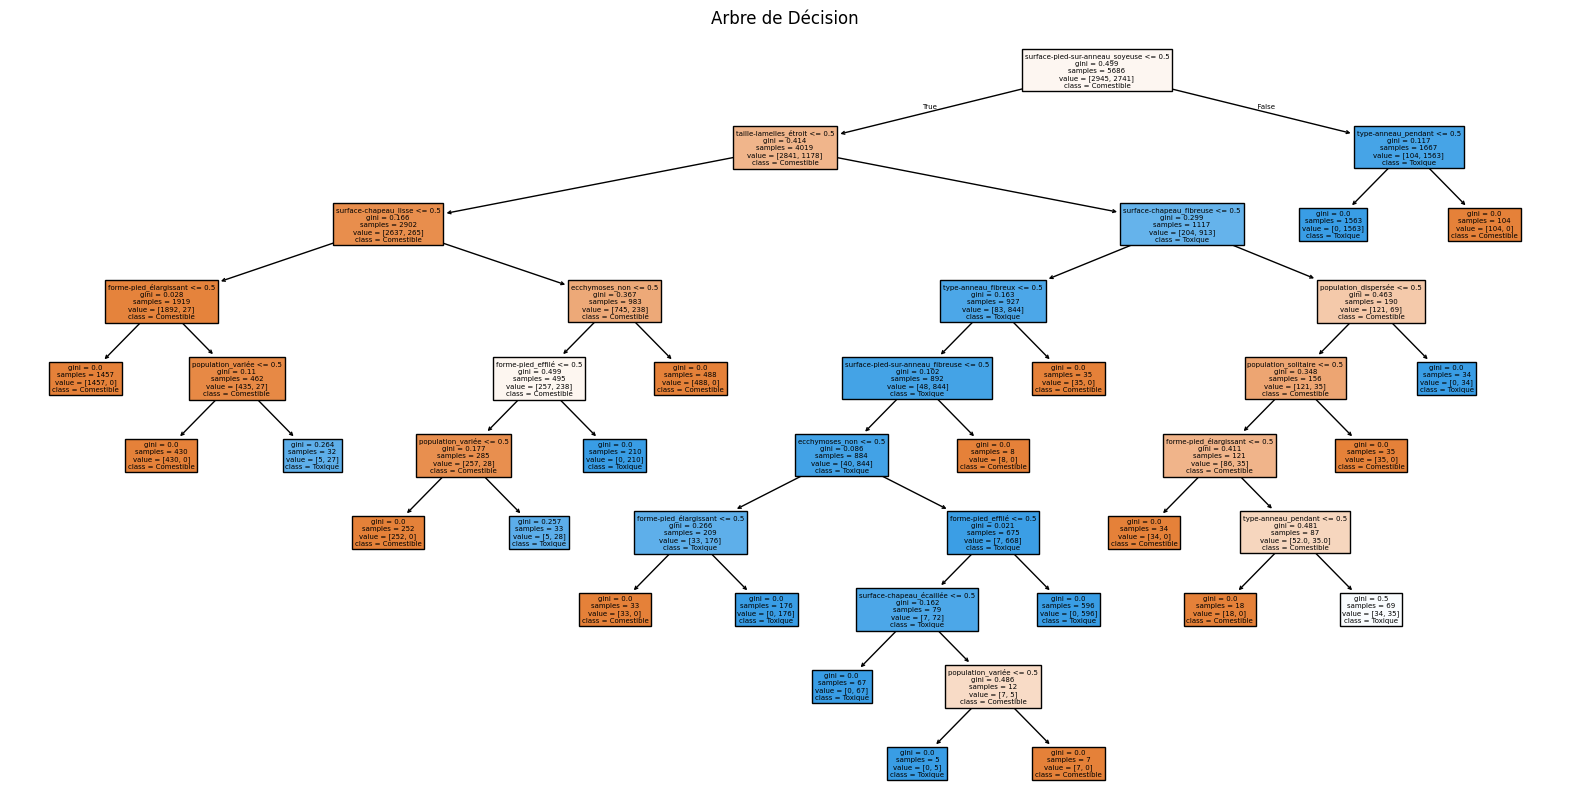

In [44]:
# Visualisation de l'arbre avec plot_tree
plt.figure(figsize=(20, 10))  # Ajustement de la taille du graphique
plot_tree(dtc, filled=True, feature_names=feature_train.columns, class_names=["Comestible", "Toxique"])
plt.title("Arbre de Décision")
plt.show() # dtc : instance du DecisionTreeClassifier

2.2 Afficher l'arbre obtenu en utilisant graphwiz

In [52]:
!pip install graphviz


In [53]:
# Importation de graphviz
from sklearn.tree import export_graphviz
import graphviz

In [54]:
# Entrainement de l'arbre de décision
dtc.fit(feature_train, label_train) # dtc : instance du DecisionTreeClassifier déclarée un peu plus haut

DecisionTreeClassifier(random_state=42)

In [55]:
# Exporter l'arbre de décision au format DOT
dot_data = export_graphviz(
    dtc,
    out_file=None,
    feature_names=feature_train.columns,
    class_names=["Comestible", "Toxique"],
    filled=True,
    rounded=True,
    special_characters=True
)

In [56]:
# Créer le graphique avec Graphviz
graph = graphviz.Source(dot_data)

# Afficher l'arbre
graph.render("arbre_decision", view=True)


'arbre_decision.pdf'

2.3 Mesurer la précision du modèle sur les données de dev

In [57]:
# Prédire les labels pour les données de dev
label_pred = dtc.predict(feature_dev)

In [59]:
# Import de accuracy_score pour l'évaluation de la précision du modèle de classification
from sklearn.metrics import accuracy_score

# Calcul de la précision du modèle
precision = accuracy_score(label_dev, label_pred)

# Affichage de la précision
print(f"Précision du modèle sur les données de dev : {precision:.2f}")

Précision du modèle sur les données de dev : 0.99


## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Initialisation du modèle Random Forest avec 500 arbres et une profondeur de 6
rf_model = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42)

# Entraînement du modèle sur les données d'entraînement
rf_model.fit(feature_train, label_train)

RandomForestClassifier(max_depth=6, n_estimators=500, random_state=42)

In [65]:
# Prédiction sur les données de dev
label_pred_rf = rf_model.predict(feature_dev)

In [66]:
# Calcul de la précision sur les données de dev
precision_rf = accuracy_score(label_dev, label_pred_rf)

# Afficher la précision
print(f"Précision du modèle Random Forest sur les données de dev : {precision_rf:.2f}")


Précision du modèle Random Forest sur les données de dev : 0.98


3.2 Afficher trois arbres au hasard.

In [67]:
# Choix des trois arbres au hasard
random_indices = np.random.choice(len(rf_model.estimators_), size=3, replace=False)

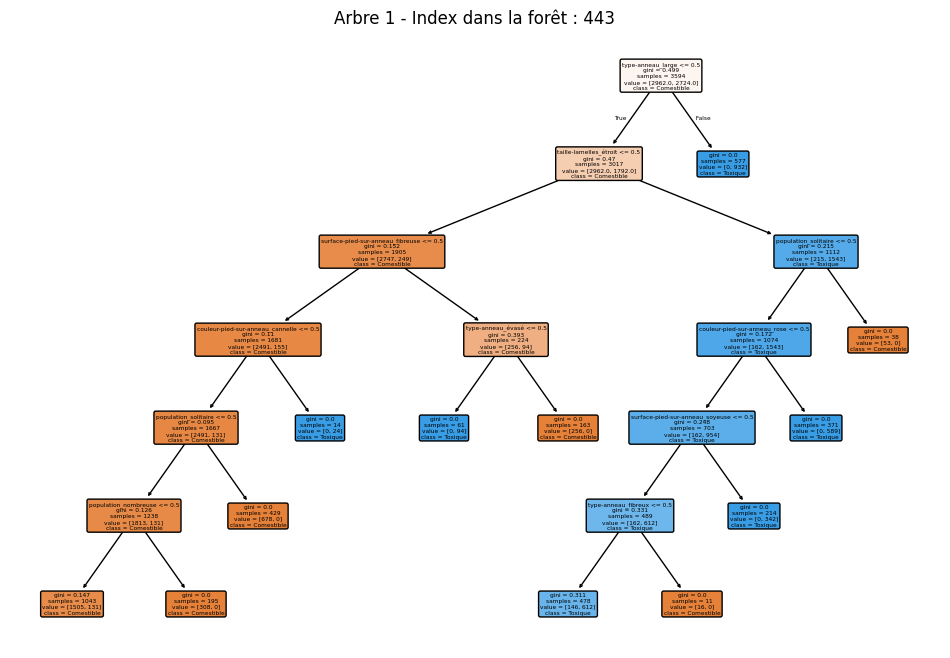

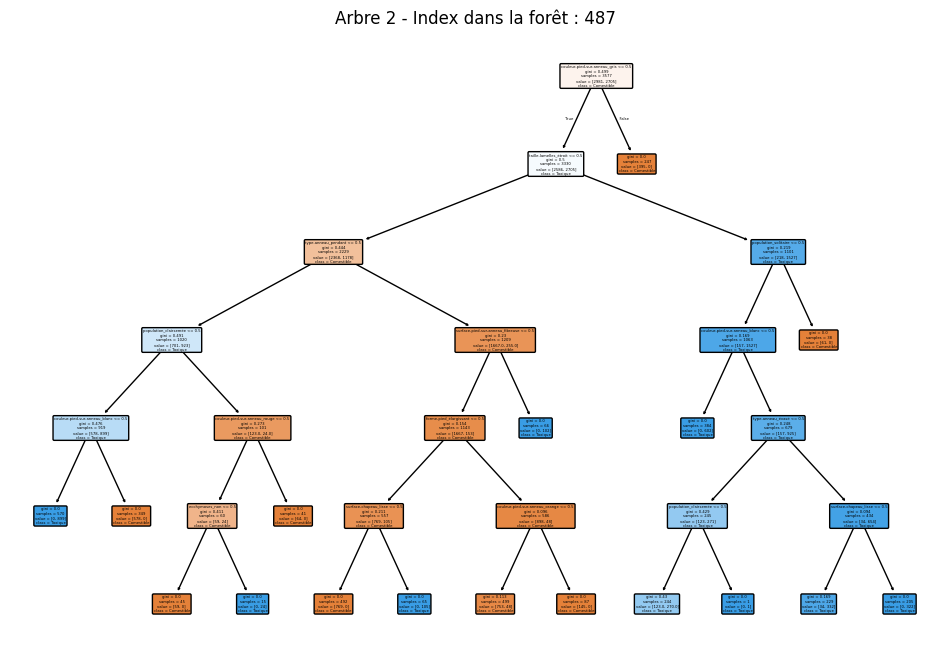

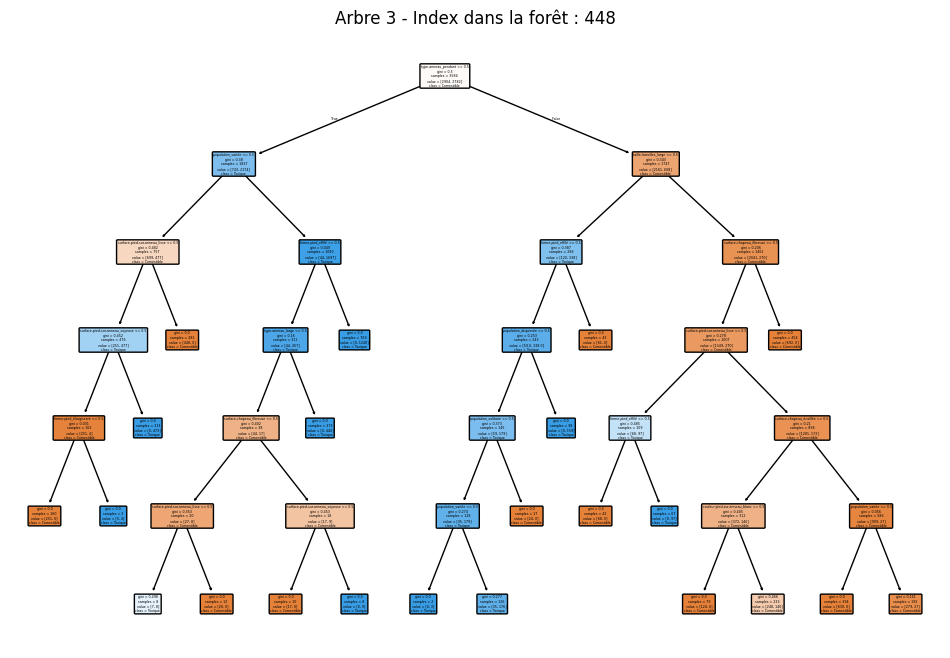

In [69]:
# Affichage des trois arbres choisis
for i, idx in enumerate(random_indices, start=1):
    plt.figure(figsize=(12, 8))
    tree = rf_model.estimators_[idx]
    plot_tree(
        tree,
        feature_names=feature_train.columns,
        class_names=["Comestible", "Toxique"],
        filled=True,
        rounded=True,
    )
    plt.title(f"Arbre {i} - Index dans la forêt : {idx}")
    plt.show()

In [70]:
from random import randint


3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [71]:
from sklearn.metrics import accuracy_score

# Prédiction sur les données de développement
label_pred_rf = rf_model.predict(feature_dev)

# Calcul de la précision sur les données de dev
precision_rf = accuracy_score(label_dev, label_pred_rf)

# Affichage de la précision
print(f"Précision du modèle Random Forest sur les données de dev : {precision_rf:.2f}")


Précision du modèle Random Forest sur les données de dev : 0.98


## 4. optimisation des paramètres

4.1 chercher l'ensemble de données la meilleure combinaison sur max_depth/n_estimator.

Afficher les paramètres du modèle et la précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [72]:
from sklearn.model_selection import GridSearchCV


In [73]:
param_grid = {
    'n_estimators': [100, 200, 500],  # Nombre d'arbres
    'max_depth': [4, 6, 8, None]     # Profondeur maximale
}

# Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Configurer GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [74]:
# Recherche par grille sur les données d'entraînement
grid_search.fit(feature_train, label_train)

# Obtention des meilleurs paramètres
best_params = grid_search.best_params_
print(f"Meilleure combinaison de paramètres : {best_params}")

# Obtention d'une meilleure précision
best_score = grid_search.best_score_
print(f"Précision obtenue avec la meilleure combinaison (validation croisée) : {best_score:.2f}")

# Réentraînement du modèle avec de meilleurs paramètres
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(feature_train, label_train)

# Évaluation sur les données de développement
label_pred_best_rf = best_rf_model.predict(feature_dev)
final_accuracy = accuracy_score(label_dev, label_pred_best_rf)
print(f"Précision finale sur les données de développement : {final_accuracy:.2f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleure combinaison de paramètres : {'max_depth': None, 'n_estimators': 100}
Précision obtenue avec la meilleure combinaison (validation croisée) : 0.99
Précision finale sur les données de développement : 0.99


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [75]:
# Affichage des paramètres optimaux
best_params = grid_search.best_params_
print(f"Meilleurs paramètres optimaux : {best_params}")

# Réentraînement du modèle avec de meilleurs paramètres
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(feature_train, label_train)

# Prédiction sur les données de dev
label_pred_best_rf = best_rf_model.predict(feature_dev)

# Calculer et afficher la précision sur les données de dev
final_accuracy = accuracy_score(label_dev, label_pred_best_rf)
print(f"Précision obtenue sur les données de dev avec les meilleurs paramètres : {final_accuracy:.2f}")


Meilleurs paramètres optimaux : {'max_depth': None, 'n_estimators': 100}
Précision obtenue sur les données de dev avec les meilleurs paramètres : 0.99


4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

In [76]:
# Récupération des importances des caractéristiques depuis le modèle entraîné
feature_importances = best_rf_model.feature_importances_

# Association des noms des caractéristiques à leurs importances
importance_df = pd.DataFrame({
    'Feature': feature_train.columns,
    'Importance': feature_importances
})

# Filtrage des caractéristiques avec une importance supérieure à 1%
important_features = importance_df[importance_df['Importance'] > 0.01]

# Classement par ordre décroissant d'importance
important_features = important_features.sort_values(by='Importance', ascending=False)

# Affichage des résultats
print("Caractéristiques avec une importance supérieure à 1% :")
print(important_features)


Caractéristiques avec une importance supérieure à 1% :
                             Feature  Importance
9             taille-lamelles_étroit    0.103344
8              taille-lamelles_large    0.100171
14   surface-pied-sur-anneau_soyeuse    0.084402
32               type-anneau_pendant    0.075374
39                 population_variée    0.065349
4                     ecchymoses_non    0.062780
13     surface-pied-sur-anneau_lisse    0.061510
10                 forme-pied_effilé    0.045695
31                 type-anneau_large    0.043990
5                     ecchymoses_oui    0.041605
11            forme-pied_élargissant    0.040844
1              surface-chapeau_lisse    0.037284
17     couleur-pied-sur-anneau_blanc    0.036234
36              population_dispersée    0.026649
12  surface-pied-sur-anneau_fibreuse    0.025765
33                 type-anneau_évasé    0.022086
0           surface-chapeau_fibreuse    0.020319
38              population_solitaire    0.019339
3           su

## 5. Stacking

Essayer différents modèles d'estimateur final

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier


In [78]:
# Définition des modèles de base
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=6, random_state=42))
]

# Test des différents modèles d'estimateur final
final_estimators = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=50, random_state=42)
]

In [80]:
for i, final_estimator in enumerate(final_estimators, start=1):
    print(f"\nModèle {i}: {type(final_estimator).__name__}")

    # Créer le stacking classifier
    stacking_model = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator,
        cv=3,
        n_jobs=-1
    )

    # Entraîner le modèle
    stacking_model.fit(feature_train, label_train)

    # Prédictions sur les données de dev
    label_pred_stack = stacking_model.predict(feature_dev)

    # Calculer la précision
    accuracy = accuracy_score(label_dev, label_pred_stack)
    print(f"Précision obtenue : {accuracy:.2f}")



Modèle 1: LogisticRegression
Précision obtenue : 0.99

Modèle 2: DecisionTreeClassifier
Précision obtenue : 0.99

Modèle 3: RandomForestClassifier
Précision obtenue : 0.99


## 6. Gradient Boosting (Optionnel avec fin cours 2 à réaliser en FOAD)

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb_no_early_stop = GradientBoostingClassifier(
    n_estimators=500,
    max_depth=6,
    random_state=42
)
gb_no_early_stop.fit(feature_train, label_train)

# Prédictions et précision sur dev
label_pred_no_early = gb_no_early_stop.predict(feature_dev)
accuracy_no_early = accuracy_score(label_dev, label_pred_no_early)
print(f"Précision sans Early Stopping : {accuracy_no_early:.2f}")

gb_early_stop = GradientBoostingClassifier(
    n_estimators=500,
    max_depth=6,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)
gb_early_stop.fit(feature_train, label_train)

# Prédictions et précision sur dev
label_pred_early = gb_early_stop.predict(feature_dev)
accuracy_early = accuracy_score(label_dev, label_pred_early)
print(f"Précision avec Early Stopping : {accuracy_early:.2f}")

Précision sans Early Stopping : 0.99
Précision avec Early Stopping : 0.99


## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?

In [101]:
from sklearn.preprocessing import OrdinalEncoder
